Importing the required libraries 

In [1]:
import tensorflow as tf
import numpy as np
import cv2
import os 
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#read the image 
img_array = cv2.imread("Drowsy_datset/train/DROWSY/1.jpg_0.png",cv2.IMREAD_GRAYSCALE)
#img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)

Shape of the image: (48, 48)


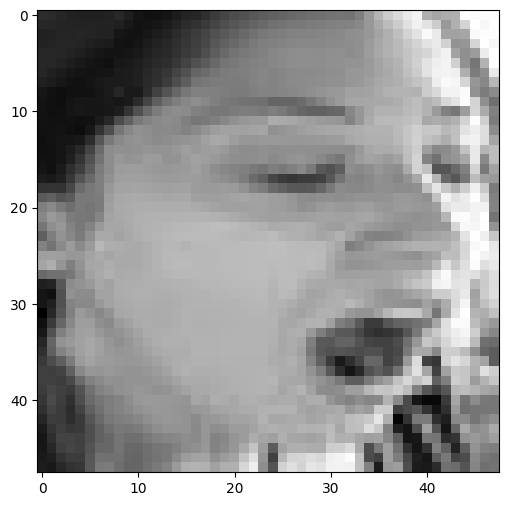

In [4]:
# display the image
plt.figure(figsize=(6,6))
plt.imshow(img_array,cmap="gray")

#prints the shape of the image
print("Shape of the image:", img_array.shape)

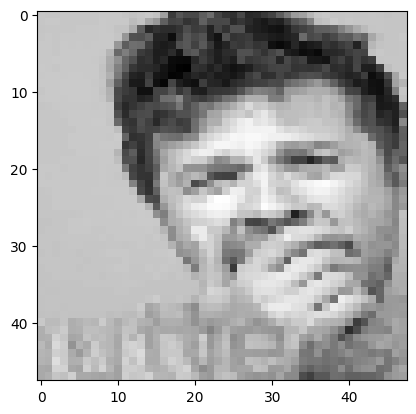

In [7]:
Datadirectory = "Drowsy_datset/train"
Classes = ["DROWSY","NATURAL"]
for category in Classes:
    path = os.path.join(Datadirectory,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break

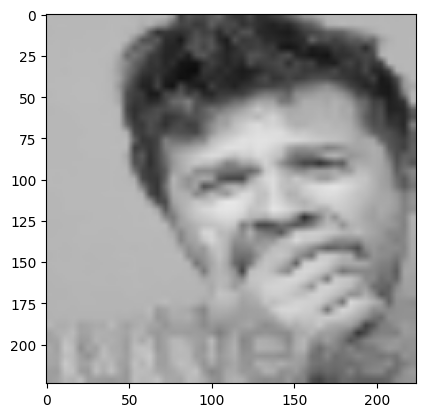

In [8]:
img_size=224
new_array = cv2.resize(backtorgb,(img_size,img_size))
plt.imshow(new_array,cmap="gray")
plt.show()

In [9]:
training_Data = []
def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory,category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb,(img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass   
        

In [10]:
create_training_Data()
print(len(training_Data))

5859


In [11]:
import random
random.shuffle(training_Data)

In [12]:
X=[]
y=[]

for features,label in training_Data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1,img_size,img_size,3)

X.shape

(5859, 224, 224, 3)

In [13]:
X = X/255.0;
Y= np.array(y)

In [14]:
import pickle
pickle_out= open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out= open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [15]:
pickle_in=open("X.pickle","rb")
X=pickle.load(pickle_in)

pickle_in=open("y.pickle","rb")
y=pickle.load(pickle_in)

Deep learning model

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [17]:
model = tf.keras.applications.mobilenet.MobileNet()
model.summary()

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 4,253,864 (16.23 MB)

 Trainable params: 4,231,976 (16.14 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [18]:
base_input = model.layers[1].input
base_output = model.layers[-4].output

In [19]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation("sigmoid")(final_output)

In [20]:
new_model = keras.Model(inputs= base_input,outputs= final_output)
new_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,229,889 (12.32 MB)

 Trainable params: 3,208,001 (12.24 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [21]:
new_model.compile(loss="binary_crossentropy",optimizer= 'adam', metrics = ['accuracy'])

In [23]:
new_model.fit(X,Y,epochs =25, validation_split =0.1)

Epoch 1/25
165/165 ━━━━━━━━━━━━━━━━━━━━ 146s 871ms/step - accuracy: 0.9636 - loss: 0.1032 - val_accuracy: 0.9266 - val_loss: 0.2417
Epoch 2/25
165/165 ━━━━━━━━━━━━━━━━━━━━ 151s 917ms/step - accuracy: 0.9924 - loss: 0.0228 - val_accuracy: 0.8311 - val_loss: 0.5786
Epoch 3/25
165/165 ━━━━━━━━━━━━━━━━━━━━ 158s 957ms/step - accuracy: 0.9881 - loss: 0.0362 - val_accuracy: 0.9915 - val_loss: 0.0175
Epoch 4/25
165/165 ━━━━━━━━━━━━━━━━━━━━ 159s 961ms/step - accuracy: 0.9954 - loss: 0.0179 - val_accuracy: 0.9556 - val_loss: 0.1076
Epoch 5/25
165/165 ━━━━━━━━━━━━━━━━━━━━ 161s 974ms/step - accuracy: 0.9958 - loss: 0.0127 - val_accuracy: 0.9539 - val_loss: 0.2447
Epoch 6/25
165/165 ━━━━━━━━━━━━━━━━━━━━ 171s 1s/step - accuracy: 0.9943 - loss: 0.0173 - val_accuracy: 0.9898 - val_loss: 0.0380
Epoch 7/25
165/165 ━━━━━━━━━━━━━━━━━━━━ 171s 1s/step - accuracy: 0.9992 - loss: 0.0025 - val_accuracy: 0.9983 - val_loss: 0.0076
Epoch 8/25
165/165 ━━━━━━━━━━━━━━━━━━━━ 163s 990ms/step - accuracy: 0.9996 - loss:

In [24]:
new_model.save('my_mod5epochs.keras')
new_mod=tf.keras.models.load_model('my_mod5epochs.keras')

In [30]:
img_array1 = cv2.imread('Drowsy_datset/test/NATURAL/v1013.png',cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array1,cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb,(224,224))

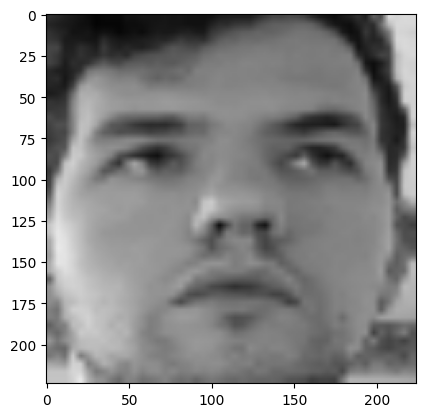

In [31]:
X_input= np.array(new_array).reshape(1,224,224,3)
X_input.shape
plt.imshow(new_array)

In [32]:
X_input=X_input/255.0
prediction = new_mod.predict(X_input)
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


array([[1.]], dtype=float32)